/home/gronk/.local/lib/python3.10/site-packages/torch/cuda/__init__.py:138: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 11060). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:108.)
  return torch._C._cuda_getDeviceCount() > 0
/home/gronk/.local/lib/python3.10/site-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


epoch,train_loss,valid_loss,error_rate,time


KeyboardInterrupt: 

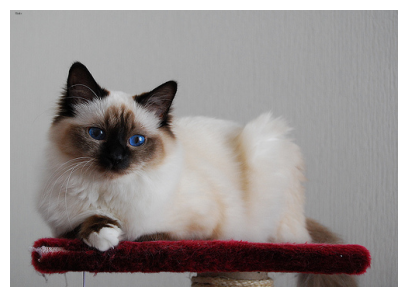

In [1]:
from fastai.vision.all import *

path = untar_data(URLs.PETS)/'images'
images = get_image_files(path)
img = PILImage.create(images[0])
img.show()

def is_cat(x): return x[0].isupper()
dls = ImageDataLoaders.from_name_func(path,
    get_image_files(path),
    valid_pct=0.2,
    seed=42,
    label_func=is_cat,
    item_tfms=Resize(224))

learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)